# Openclassroom - Notebook Projet 4

# Réalisez une étude de santé publique avec R ou Python

In [129]:
#import de librairies
import pandas as pd
import matplotlib as plt
import numpy as np

In [130]:
#telecharge des fichiers
df_population = pd.read_csv('population.csv') 
df_aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
df_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
df_sous_nutrition = pd.read_csv('sous_nutrition.csv',sep=';')

# la proportion de personnes en état de sous-nutrition
l'obejtive et de recupere la population mondial et la sous nutrition mondial et de calcule le ratio entre les deuxL'objectif de cette partie est de calculer la proportion de personnes en sous nutrition.
Pour se faire nous allons recuperer la popuplation mondiale en 2017 et les personnes en sous nutrition en 2017 et calculer le ratio entre les 2

In [131]:
#filtre année 2017
df_sous_nutrition = df_sous_nutrition [df_sous_nutrition['Annee']=='2016-2018']
df_population = df_population [df_population ['Année']==2017 ]

In [132]:
#remplacer les na par 0
df_population =df_population.fillna(0) 
df_sous_nutrition =df_sous_nutrition.fillna(0)
df_dispo_alimentaire =df_dispo_alimentaire.fillna(0)
df_aide_alimentaire =df_aide_alimentaire.fillna(0)

In [133]:
df_population.rename(columns={'Valeur': 'population'}, inplace=True) 

df_sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [134]:
#agreagation des table sous nutrition & Population
df_nutrition_population = pd.merge(df_sous_nutrition,df_population,on= 'Zone' ,how='inner')

In [135]:
df_nutrition_population.rename(columns={'Valeur_x': 'sous_nutrition', 'Valeur_y': 'population'}, inplace=True)

In [136]:
#forcé valeur x & y a float 
df_nutrition_population ['sous_nutrition'] = pd.to_numeric(df_nutrition_population ['sous_nutrition'], errors='coerce')
df_nutrition_population ['sous_nutrition'] = df_nutrition_population ['sous_nutrition'].astype(float) 
df_nutrition_population ['population'] = df_nutrition_population ['population'].astype(float)

In [137]:
# population en sous nutrition
sous_nutrition_2017 = df_sous_nutrition [df_sous_nutrition['Annee']=='2016-2018'] 
sous_nutrition_sous_pop = sous_nutrition_2017 ['sous_nutrition'].sum()*1000000
sous_nutrition_sous_pop

535700000.00000006

In [138]:
# population mondiale totale en 2017
df_population_1 = df_population[df_population ['Année']==2017]
population_2017 = df_population_1['population'].sum()*1000
population_2017

7548134111.000001

In [139]:
# calcul du ratio de personnes en sous nutrition
pourcentage=( sous_nutrition_sous_pop /population_2017 )*100 
round (pourcentage,2) 
# arroundi a 2 chiffres apres la virgule

7.1

In [140]:
df_population.head(5)

,Zone,Année,population
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [141]:
df_population.describe( )

,Année,population
count,236.0,2.360000e+02
mean,2017.0,3.198362e+04
std,0.0,1.318949e+05
min,2017.0,7.930000e-01
25%,2017.0,3.803032e+02
50%,2017.0,5.203511e+03
75%,2017.0,1.930842e+04
max,2017.0,1.421022e+06


In [142]:
df_aide_alimentaire.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [143]:
df_dispo_alimentaire.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df_sous_nutrition.head(10)

,Zone,Annee,sous_nutrition
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
28,Allemagne,2016-2018,0.0
34,Andorre,2016-2018,0.0
40,Angola,2016-2018,5.8
46,Antigua-et-Barbuda,2016-2018,0.0
52,Arabie saoudite,2016-2018,1.6
58,Argentine,2016-2018,1.5


In [145]:
df_population = df_population [df_population ['Année']==2017 ]

In [146]:
df_nutrition_population.head()

,Zone,Annee,sous_nutrition,Année,population
0,Afghanistan,2016-2018,10.5,2017,36296.113
1,Afrique du Sud,2016-2018,3.1,2017,57009.756
2,Albanie,2016-2018,0.1,2017,2884.169
3,Algérie,2016-2018,1.3,2017,41389.189
4,Allemagne,2016-2018,0.0,2017,82658.409


# le nombre théorique de personnes qui pourraient être nourries via partir de la disponibilité alimentaire mondiale

In [147]:
Totaux = (df_nutrition_population ['sous_nutrition'].sum()/(df_nutrition_population ['population'].sum() )*1000)*100
Totaux

8.768503318082159

In [148]:
df_marge_dispo_population = pd.merge(df_dispo_alimentaire,df_population,on= 'Zone') 

In [149]:
df_marge_dispo_population

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,36296.113
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296.113
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017,36296.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2017,636.039
15412,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,636.039
15413,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636.039
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636.039


In [150]:
df_marge_dispo_populationt = df_marge_dispo_population [ [ 'Origine','Disponibilité alimentaire (Kcal/personne/jour)','Zone','population' ] ]

In [151]:
df_dispo_alimentaire_population = pd.merge(df_dispo_alimentaire, df_population,on='Zone') 

df_dispo_alimentaire_population = df_dispo_alimentaire_population [['population','Disponibilité alimentaire (Kcal/personne/jour)','Zone','Origine']]

df_dispo_alimentaire_population ['kcalj'] = df_dispo_alimentaire_population ['Disponibilité alimentaire (Kcal/personne/jour)']* df_dispo_alimentaire_population ['population']* 1000

Personne_nourries = round(df_dispo_alimentaire_population['kcalj'].sum() /2500)


population_Mondiale = round(df_population['population'].sum() *1000) 

# Pourcentage de personnes pouvant être nourries
Resultat = Personne_nourries/population_Mondiale*100 

# Arrondi du pourcentage de personnes pouvant être nourries
Resultat = round(Resultat) 

# 
print("La disponibilité alimentaire est de "+str(Resultat)+"% pour la population mondiale.") 
print("Les Kcalj sont de "+str(df_dispo_alimentaire_population['kcalj'].sum()))

La disponibilité alimentaire est de 111% pour la population mondiale.
Les Kcalj sont de 20918984627331.0


# idem pour la disponibilité alimentaire des produits végétaux

In [152]:
df_dispo_alimentaire_population = df_dispo_alimentaire_population [ df_dispo_alimentaire_population ['Origine'] == 'vegetale']

df_dispo_alimentaire_population = df_dispo_alimentaire_population [['population','Disponibilité alimentaire (Kcal/personne/jour)','Zone','Origine']]

df_dispo_alimentaire_population ['kcalj'] = df_dispo_alimentaire_population ['Disponibilité alimentaire (Kcal/personne/jour)']* df_dispo_alimentaire_population ['population']* 1000

Personne_nourries = round(df_dispo_alimentaire_population ['kcalj'].sum() /2500)


population_Mondiale = round(df_population['population'].sum() *1000) 

# Pourcentage de personnes pouvant être nourries
Resultat = Personne_nourries/population_Mondiale*100 

# Arrondi du pourcentage de personnes pouvant être nourries
Resultat = round(Resultat) 

# 
print("La disponibilité alimentaire est de "+str(Resultat)+"% pour la population mondiale.") 
print("Les Kcalj sont de "+str( df_dispo_alimentaire_population ['kcalj'].sum()))

La disponibilité alimentaire est de 91% pour la population mondiale.
Les Kcalj sont de 17260764211501.0


In [153]:
df_dispo_alimentaire_population.head(10)

,population,Disponibilité alimentaire (Kcal/personne/jour),Zone,Origine,kcalj
1,36296.113,1.0,Afghanistan,vegetale,3.629611e+07
2,36296.113,1.0,Afghanistan,vegetale,3.629611e+07
3,36296.113,0.0,Afghanistan,vegetale,0.000000e+00
4,36296.113,4.0,Afghanistan,vegetale,1.451845e+08
6,36296.113,0.0,Afghanistan,vegetale,0.000000e+00
7,36296.113,1369.0,Afghanistan,vegetale,4.968938e+10
8,36296.113,0.0,Afghanistan,vegetale,0.000000e+00
9,36296.113,0.0,Afghanistan,vegetale,0.000000e+00
10,36296.113,0.0,Afghanistan,vegetale,0.000000e+00
12,36296.113,0.0,Afghanistan,vegetale,0.000000e+00


# l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. 

In [154]:
df_dispo_population_jointure = pd.merge(df_dispo_alimentaire, df_population,on='Zone') 

df_dispo_population_jointure = df_dispo_population_jointure [ df_dispo_population_jointure ['Origine'] == 'animale']

Disponibilité_Alimentaire = df_dispo_alimentaire.iloc[:,3:].sum()

#project_production  
Disponibilité_production = df_dispo_population_jointure [ df_dispo_population_jointure == 'Nourriture']
#project_animale  
Disponibilité_animale = df_dispo_population_jointure [ df_dispo_population_jointure == 'Aliments pour animaux']
#project_intérieure 
Disponibilité_Pertes = df_dispo_population_jointure [ df_dispo_population_jointure == 'Pertes']
#Project_humain
Disponibilité_Intérieure = df_dispo_population_jointure [ df_dispo_population_jointure == 'Disponibilité intérieure']

In [155]:
Disponibilité_Alimentaire

Aliments pour animaux                                             1304245.00
Autres Utilisations                                                865023.00
Disponibilité alimentaire (Kcal/personne/jour)                     495442.00
Disponibilité alimentaire en quantité (kg/personne/an)             122201.94
Disponibilité de matière grasse en quantité (g/personne/jour)       15133.01
Disponibilité de protéines en quantité (g/personne/jour)            14146.13
Disponibilité intérieure                                          9848994.00
Exportations - Quantité                                           1352158.00
Importations - Quantité                                           1296053.00
Nourriture                                                        4876258.00
Pertes                                                             453698.00
Production                                                       10009680.00
Semences                                                           154681.00

<AxesSubplot:>

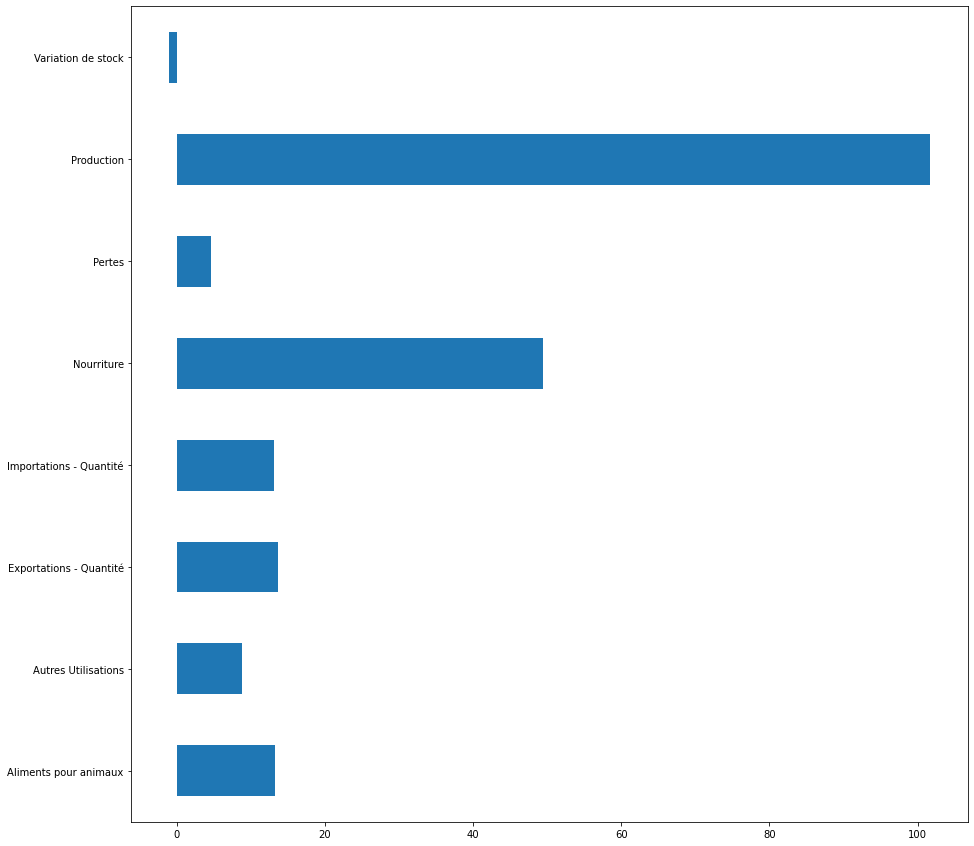

In [156]:
# Jointure Disponibilité Alimentaire et Population
df__dispoalimentaire_population = pd.merge(df_dispo_alimentaire, df_population, on='Zone')

# Affichage des lignes et des colonnes à partir de la 3
DispoAlimentaire = df_dispo_alimentaire.iloc[:,3:].sum()

# Somme des DispoINT 
DispoINT =df_dispo_alimentaire["Disponibilité intérieure"].sum()

# Calcul Ratio Animaux
RatioAnimaux = round (df_dispo_alimentaire["Aliments pour animaux"].sum() / DispoINT * 100,2 )

# Calcul Ratio Nourriture
RatioNourriture = round (df_dispo_alimentaire["Nourriture"].sum() / DispoINT * 100,2 )

# Calcul Ratio Pertes
RatioPerte = round (df_dispo_alimentaire["Pertes"].sum() / DispoINT * 100,2 )

# calcul à partir de la colonne 3
df_dispo_alimentaire.iloc[:,3:].sum()

# Choix des colonnes
DispoAlimentaire_2 = DispoAlimentaire[["Aliments pour animaux", "Autres Utilisations", "Exportations - Quantité", "Importations - Quantité" , "Nourriture" , "Pertes" , "Production" , "Variation de stock" ]]/DispoINT*100

# Choix des graphiques 
DispoAlimentaire_2.plot(kind = "barh",figsize = (15,15))

In [157]:
df_dispo_alimentaire_population.head()

,population,Disponibilité alimentaire (Kcal/personne/jour),Zone,Origine,kcalj
1,36296.113,1.0,Afghanistan,vegetale,36296113.0
2,36296.113,1.0,Afghanistan,vegetale,36296113.0
3,36296.113,0.0,Afghanistan,vegetale,0.0
4,36296.113,4.0,Afghanistan,vegetale,145184452.0
6,36296.113,0.0,Afghanistan,vegetale,0.0


# j’aimerais que tu puisses nous donner les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [158]:
df_pop_sous_nutrition = pd.merge(df_population,df_sous_nutrition [["Zone", "sous_nutrition"]] , how='inner', on = 'Zone') 

In [159]:
# affichage des 5 premieres lignes de la table df_pop_sous_nutrition
df_pop_sous_nutrition.head(5)

,Zone,Année,population,sous_nutrition
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,0.0


In [160]:
df_pop_sous_nutrition['population'] = pd.to_numeric(df_pop_sous_nutrition['population'], errors='ignore')
df_pop_sous_nutrition['sous_nutrition'] = pd.to_numeric(df_pop_sous_nutrition['sous_nutrition'], errors='ignore')

In [161]:
df_pop_sous_nutrition["sous_nutrition" ]*1000

0      10500.0
1       3100.0
2        100.0
3       1300.0
4          0.0
        ...   
196     8000.0
197     6500.0
198        0.0
199        0.0
200        0.0
Name: sous_nutrition, Length: 201, dtype: float64

In [162]:
df_pop_sous_nutrition.head()

,Zone,Année,population,sous_nutrition
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,0.0


# toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire

In [166]:
df_dispo_alimentaire_zone_nouriture = df_dispo_alimentaire.loc [:,('Zone', 'Nourriture')] 

In [167]:
df_dispo_alimentaire_zone_nouriture.head(10)

,Zone,Nourriture
0,Afghanistan,53.0
1,Afghanistan,39.0
2,Afghanistan,2.0
3,Afghanistan,0.0
4,Afghanistan,82.0
5,Afghanistan,36.0
6,Afghanistan,3.0
7,Afghanistan,4895.0
8,Afghanistan,0.0
9,Afghanistan,0.0


In [168]:
df_dispo_alimentaire_zone_nouriture = (df_dispo_alimentaire_zone_nouriture.groupby(['Zone'])['Nourriture'].agg('sum'))

In [169]:
df_dispo_alimentaire_zone_nouriture 

Zone
Afghanistan               10735.0
Afrique du Sud            29812.0
Albanie                    3476.0
Algérie                   31729.0
Allemagne                 79238.0
                           ...   
Émirats arabes unis        6548.0
Équateur                   8574.0
États-Unis d'Amérique    320889.0
Éthiopie                  33361.0
Îles Salomon                362.0
Name: Nourriture, Length: 174, dtype: float64

In [170]:
df_dispo_alimentaire_zone_nouriture_pop = pd.merge(df_population,df_dispo_alimentaire_zone_nouriture , how='inner', on = 'Zone')

In [171]:
df_dispo_alimentaire_zone_nouriture_pop.head(10)

,Zone,Année,population,Nourriture
0,Afghanistan,2017,36296.113,10735.0
1,Afrique du Sud,2017,57009.756,29812.0
2,Albanie,2017,2884.169,3476.0
3,Algérie,2017,41389.189,31729.0
4,Allemagne,2017,82658.409,79238.0
5,Angola,2017,29816.766,15059.0
6,Antigua-et-Barbuda,2017,95.426,58.0
7,Arabie saoudite,2017,33101.179,17956.0
8,Argentine,2017,43937.140,32531.0
9,Arménie,2017,2944.791,2929.0


In [172]:
df_dispo_alimentaire_zone_nouriture_pop ["ratio_pop_dispo"] = round (( df_dispo_alimentaire_zone_nouriture_pop ["Nourriture"]*1000) /(df_dispo_alimentaire_zone_nouriture_pop["population"]*1000), 4)

In [173]:
df_dispo_alimentaire_zone_nouriture_pop

,Zone,Année,population,Nourriture,ratio_pop_dispo
0,Afghanistan,2017,36296.113,10735.0,0.2958
1,Afrique du Sud,2017,57009.756,29812.0,0.5229
2,Albanie,2017,2884.169,3476.0,1.2052
3,Algérie,2017,41389.189,31729.0,0.7666
4,Allemagne,2017,82658.409,79238.0,0.9586
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,19853.0,0.6752
168,Viet Nam,2017,94600.648,52700.0,0.5571
169,Yémen,2017,27834.819,9162.0,0.3292
170,Zambie,2017,16853.599,5088.0,0.3019


In [174]:
df_dispo_alimentaire_zone_nouriture_pop_dec = ( df_dispo_alimentaire_zone_nouriture_pop.sort_values("ratio_pop_dispo", ascending=False).reset_index(drop=True) )

In [175]:
df_dispo_alimentaire_zone_nouriture_pop_dec.head(20)

,Zone,Année,population,Nourriture,ratio_pop_dispo
0,Albanie,2017,2884.169,3476.0,1.2052
1,Monténégro,2017,627.563,752.0,1.1983
2,Grèce,2017,10569.450,11919.0,1.1277
3,Irlande,2017,4753.279,5320.0,1.1192
4,Lituanie,2017,2845.414,3169.0,1.1137
5,Roumanie,2017,19653.969,21798.0,1.1091
6,Finlande,2017,5511.371,5938.0,1.0774
7,Pays-Bas,2017,17021.347,17924.0,1.0530
8,Portugal,2017,10288.527,10801.0,1.0498
9,Bosnie-Herzégovine,2017,3351.525,3498.0,1.0437


In [176]:
df_dispo_alimentaire_zone_nouriture_pop_dec = (df_dispo_alimentaire_zone_nouriture_pop.sort_values("ratio_pop_dispo", ascending=True ).reset_index(drop=True))

In [177]:
df_dispo_alimentaire_zone_nouriture_pop_dec.head(10)

,Zone,Année,population,Nourriture,ratio_pop_dispo
0,Tchad,2017,15016.753,4097.0,0.2728
1,Afghanistan,2017,36296.113,10735.0,0.2958
2,Zambie,2017,16853.599,5088.0,0.3019
3,Éthiopie,2017,106399.924,33361.0,0.3135
4,Gambie,2017,2213.889,701.0,0.3166
5,Yémen,2017,27834.819,9162.0,0.3292
6,Guinée-Bissau,2017,1828.145,609.0,0.3331
7,Zimbabwe,2017,14236.595,4762.0,0.3345
8,Timor-Leste,2017,1243.258,419.0,0.3370
9,Sénégal,2017,15419.355,5329.0,0.3456


In [178]:
df_dispo_alimentaire_zone_nouriture_pop_joint = pd.merge (df_dispo_alimentaire_zone_nouriture_pop, df_dispo_alimentaire_zone_nouriture_pop_dec,left_index=True, right_index=True)

In [179]:
df_dispo_alimentaire_zone_nouriture_pop_joint.head (10)

,Zone_x,Année_x,population_x,Nourriture_x,ratio_pop_dispo_x,Zone_y,Année_y,population_y,Nourriture_y,ratio_pop_dispo_y
0,Afghanistan,2017,36296.113,10735.0,0.2958,Tchad,2017,15016.753,4097.0,0.2728
1,Afrique du Sud,2017,57009.756,29812.0,0.5229,Afghanistan,2017,36296.113,10735.0,0.2958
2,Albanie,2017,2884.169,3476.0,1.2052,Zambie,2017,16853.599,5088.0,0.3019
3,Algérie,2017,41389.189,31729.0,0.7666,Éthiopie,2017,106399.924,33361.0,0.3135
4,Allemagne,2017,82658.409,79238.0,0.9586,Gambie,2017,2213.889,701.0,0.3166
5,Angola,2017,29816.766,15059.0,0.5051,Yémen,2017,27834.819,9162.0,0.3292
6,Antigua-et-Barbuda,2017,95.426,58.0,0.6078,Guinée-Bissau,2017,1828.145,609.0,0.3331
7,Arabie saoudite,2017,33101.179,17956.0,0.5425,Zimbabwe,2017,14236.595,4762.0,0.3345
8,Argentine,2017,43937.140,32531.0,0.7404,Timor-Leste,2017,1243.258,419.0,0.3370
9,Arménie,2017,2944.791,2929.0,0.9946,Sénégal,2017,15419.355,5329.0,0.3456


# ceux qui ont le plus bénéficié d’aide depuis 2013 

In [180]:
df_aide_alimentaire =(df_aide_alimentaire.groupby(['Pays bénéficiaire'])['Valeur'].agg('sum').sort_values(ascending=False).to_frame().reset_index())

In [181]:
df_aide_alimentaire.head(10)

,Pays bénéficiaire,Valeur
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


# l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. 

In [182]:
df_disponibilite_total = df_dispo_alimentaire [ 'Disponibilité intérieure' ].sum() 

In [183]:
df_disponibilite_total 

9848994.0

In [184]:
#alimentation animal
df_dispo_animal = df_dispo_alimentaire['Aliments pour animaux'].sum()

In [185]:
par_animeaux =round(((df_dispo_animal/df_disponibilite_total)*100),2)
par_animeaux 

13.24

In [186]:
#pourcentage des pertes
df_pertes = df_dispo_alimentaire['Pertes'].sum()

part_pertes=round(((df_pertes /df_disponibilite_total)*100),2) 

part_pertes 

4.61

In [187]:
#pourcentage disponibilité pour les humains
df_humain = df_dispo_alimentaire['Nourriture'].sum()

part_humains=round(((df_humain/df_disponibilite_total)*100),2) 

part_humains 

49.51

In [188]:
dispo_utilisé = par_animeaux+ part_pertes+ part_humains

In [189]:
dispo_utilisé

67.36

In [190]:
#reste de la dispo_interieur
reste_dispo_interieure = 100 -dispo_utilisé

In [191]:
reste_dispo_interieure

32.64

# Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

In [192]:
df_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

In [232]:
# disponiblite alimentaire en thailande (manioc uniquement)
df_dispo_alimentaire.head()
A = df_dispo_alimentaire[(df_dispo_alimentaire['Zone']=='Thaïlande') & (df_dispo_alimentaire['Produit']=='Manioc')]

In [235]:
A

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [244]:
export=A["Exportations - Quantité"].iloc[0] 
Production=A["Production"].iloc[0]
print("Propotion de Manioc exporté "+str(100*export/Production)+" pourcentage" )

Propotion de Manioc exporté 83.41272991928014 pourcentage


# La Thaïlande exporte une large quantite de Manioc alors que 6,2% de sa population et en sous nutrition

In [252]:
df_pop_sous_nutrition_Thai

,Zone,Année,population,sous_nutrition
183,Thaïlande,2017,69209.81,6.2


In [256]:
# sous nutrition en Thailande de 6.2%
a  =df_pop_sous_nutrition_Thai['population'].iloc[0]
b  =df_pop_sous_nutrition_Thai['sous_nutrition'].iloc[0] * 1000000

In [259]:
print(a/b*100)


1.1162872580645162


# ceux ayant le plus/le moins de disponibilité/habitant

In [195]:
# 
df_dispo_alimentaire_2 = df_dispo_alimentaire.loc[:,('Zone', 'Nourriture')]

In [196]:
df_dispo_alimentaire_2

,Zone,Nourriture
0,Afghanistan,53.0
1,Afghanistan,39.0
2,Afghanistan,2.0
3,Afghanistan,0.0
4,Afghanistan,82.0
...,...,...
15600,Îles Salomon,3.0
15601,Îles Salomon,2.0
15602,Îles Salomon,0.0
15603,Îles Salomon,0.0


In [197]:
df_dispo_alim_dispo_int=(df_dispo_alimentaire_2.groupby(['Zone'])['Nourriture'].agg('sum').sort_values(ascending=False).to_frame().reset_index())

In [198]:
df_dispo_alim_dispo_int

,Zone,Nourriture
0,"Chine, continentale",1249625.0
1,Inde,619168.0
2,États-Unis d'Amérique,320889.0
3,Brésil,156246.0
4,Fédération de Russie,126945.0
...,...,...
169,Kiribati,67.0
170,Grenade,60.0
171,Antigua-et-Barbuda,58.0
172,Bermudes,51.0


In [199]:
df_pop_dispo_int = pd.merge(df_population,df_dispo_alim_dispo_int , how='inner', on = 'Zone')

In [200]:
df_pop_dispo_int

,Zone,Année,population,Nourriture
0,Afghanistan,2017,36296.113,10735.0
1,Afrique du Sud,2017,57009.756,29812.0
2,Albanie,2017,2884.169,3476.0
3,Algérie,2017,41389.189,31729.0
4,Allemagne,2017,82658.409,79238.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,19853.0
168,Viet Nam,2017,94600.648,52700.0
169,Yémen,2017,27834.819,9162.0
170,Zambie,2017,16853.599,5088.0


In [201]:
df_pop_dispo_int["ratio_pop_dispo_int"] = round((df_pop_dispo_int["Nourriture"]*1000) /(df_pop_dispo_int["population"]*1000),4)
df_pop_dispo_int

,Zone,Année,population,Nourriture,ratio_pop_dispo_int
0,Afghanistan,2017,36296.113,10735.0,0.2958
1,Afrique du Sud,2017,57009.756,29812.0,0.5229
2,Albanie,2017,2884.169,3476.0,1.2052
3,Algérie,2017,41389.189,31729.0,0.7666
4,Allemagne,2017,82658.409,79238.0,0.9586
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,19853.0,0.6752
168,Viet Nam,2017,94600.648,52700.0,0.5571
169,Yémen,2017,27834.819,9162.0,0.3292
170,Zambie,2017,16853.599,5088.0,0.3019


In [202]:
# Top 20 des pays avec dispo alimentaire par Habitant
df_pays_plus_de_dispo_int_par_hab = (df_pop_dispo_int.sort_values("ratio_pop_dispo_int", ascending=False).reset_index(drop=True))
df_pays_plus_de_dispo_int_par_hab.head(20)

,Zone,Année,population,Nourriture,ratio_pop_dispo_int
0,Albanie,2017,2884.169,3476.0,1.2052
1,Monténégro,2017,627.563,752.0,1.1983
2,Grèce,2017,10569.450,11919.0,1.1277
3,Irlande,2017,4753.279,5320.0,1.1192
4,Lituanie,2017,2845.414,3169.0,1.1137
5,Roumanie,2017,19653.969,21798.0,1.1091
6,Finlande,2017,5511.371,5938.0,1.0774
7,Pays-Bas,2017,17021.347,17924.0,1.0530
8,Portugal,2017,10288.527,10801.0,1.0498
9,Bosnie-Herzégovine,2017,3351.525,3498.0,1.0437


In [203]:
# Top 20 des pays avec moins dispo alimentaire par Habitant
df_pays_moins_de_dispo_int_par_hab = (df_pop_dispo_int.sort_values("ratio_pop_dispo_int", ascending=True).reset_index(drop=True))
df_pays_moins_de_dispo_int_par_hab.head(20)

,Zone,Année,population,Nourriture,ratio_pop_dispo_int
0,Tchad,2017,15016.753,4097.0,0.2728
1,Afghanistan,2017,36296.113,10735.0,0.2958
2,Zambie,2017,16853.599,5088.0,0.3019
3,Éthiopie,2017,106399.924,33361.0,0.3135
4,Gambie,2017,2213.889,701.0,0.3166
5,Yémen,2017,27834.819,9162.0,0.3292
6,Guinée-Bissau,2017,1828.145,609.0,0.3331
7,Zimbabwe,2017,14236.595,4762.0,0.3345
8,Timor-Leste,2017,1243.258,419.0,0.3370
9,Sénégal,2017,15419.355,5329.0,0.3456


In [218]:
df_full = pd.merge(df_pays_plus_de_dispo_int_par_hab, df_pays_moins_de_dispo_int_par_hab,left_index=True, right_index=True)

In [220]:
df_full = df_full.rename(columns={'Zone_x':'pays_plus_dispo_int', 'Zone_y':'pays_moins_dispo_int', 
                                  'ratio_pop_dispo_int_x':'ratio_pays_plus_dispo', 
                                  'ratio_pop_dispo_int_y':'ratio_pays_moins_dispo'})


In [224]:
df_full

,pays_plus_dispo_int,Année_x,population_x,Nourriture_x,ratio_pays_plus_dispo,pays_moins_dispo_int,Année_y,population_y,Nourriture_y,ratio_pays_moins_dispo
0,Albanie,2017,2884.169,3476.0,1.2052,Tchad,2017,15016.753,4097.0,0.2728
1,Monténégro,2017,627.563,752.0,1.1983,Afghanistan,2017,36296.113,10735.0,0.2958
2,Grèce,2017,10569.450,11919.0,1.1277,Zambie,2017,16853.599,5088.0,0.3019
3,Irlande,2017,4753.279,5320.0,1.1192,Éthiopie,2017,106399.924,33361.0,0.3135
4,Lituanie,2017,2845.414,3169.0,1.1137,Gambie,2017,2213.889,701.0,0.3166
...,...,...,...,...,...,...,...,...,...,...
167,Gambie,2017,2213.889,701.0,0.3166,Lituanie,2017,2845.414,3169.0,1.1137
168,Éthiopie,2017,106399.924,33361.0,0.3135,Irlande,2017,4753.279,5320.0,1.1192
169,Zambie,2017,16853.599,5088.0,0.3019,Grèce,2017,10569.450,11919.0,1.1277
170,Afghanistan,2017,36296.113,10735.0,0.2958,Monténégro,2017,627.563,752.0,1.1983


In [229]:
#Top 20 
df_top_20 = df_full [["pays_plus_dispo_int", "ratio_pays_plus_dispo", "pays_moins_dispo_int", "ratio_pays_moins_dispo"]]

In [231]:
df_top_20.head(20)

,pays_plus_dispo_int,ratio_pays_plus_dispo,pays_moins_dispo_int,ratio_pays_moins_dispo
0,Albanie,1.2052,Tchad,0.2728
1,Monténégro,1.1983,Afghanistan,0.2958
2,Grèce,1.1277,Zambie,0.3019
3,Irlande,1.1192,Éthiopie,0.3135
4,Lituanie,1.1137,Gambie,0.3166
5,Roumanie,1.1091,Yémen,0.3292
6,Finlande,1.0774,Guinée-Bissau,0.3331
7,Pays-Bas,1.0530,Zimbabwe,0.3345
8,Portugal,1.0498,Timor-Leste,0.3370
9,Bosnie-Herzégovine,1.0437,Sénégal,0.3456
